In [2]:
import numpy as np
import scipy.stats as st
from matplotlib import pyplot as plt
import sys
sys.path.append("../")
import os

from distribution import Pareto, Exp, Normal
from util import exists, list_results, load, save

from general_prior import *

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')
from matplotlib import rcParams
rcParams['font.family'] = 'serif'

import matplotlib
matplotlib.style.use('classic')
import pickle as pkl


from finite import curves_one_stage, curves_two_stage
from finite import greedy, dp, beta, get_data
from tqdm import tqdm_notebook

In [22]:
param = {
    'sigmag': [0.1, 0.1],
    'pg': [0.4, 0.6],
    'a2': 0.1,
}

In [23]:
def calc_u2_ratio(n=1000, T=100, pot=st.norm(1,1), param=param):
    a1s = np.arange(0.1, 1.01, 0.01)
    for fact in [1, 2, 3, 4]:
        res = {'gr': [], 'dp': [], 'beta': []}
        param['sigmag'][0] = param['sigmag'][1] * fact
        for t in tqdm_notebook(range(T)):
            data = get_data(n, param, potential=pot)
            res['gr'].append(curves_two_stage(data,  a1s, T=T, alg=greedy))
            res['dp'].append(curves_two_stage(data,  a1s, T=T, alg=dp))
            res['beta'].append(curves_two_stage(data,  a1s, T=T, alg=beta))

        res['gr'] = np.array(res['gr'])
        res['dp'] = np.array(res['dp'])
        res['beta'] = np.array(res['beta'])
        with open("./data/diff_distrs/{}/{}-stage-{}-{}.pkl".format(pot.dist.name, 2, n, fact), 'wb') as f:
            pkl.dump(res, f)        
        with open("./data/diff_distrs/{}/{}-stage-{}-{}.pkl".format(pot.dist.name, 2, n, fact), 'rb') as f:
            res2 = pkl.load(f)
            
def plot_and_save_u2(n=1000, pot=st.norm(1,1)):
    plt.figure(figsize=(3,3))
    lw=1
    color = ['r', 'g', 'b', 'k']
    ls = ['-', '--', '-.', ':']
    for i, fact in enumerate([1,2,3,4]):
        with open("./data/diff_distrs/{}/{}-stage-{}-{}.pkl".format(pot.dist.name, 2, n, fact), 'rb') as f:
            res = pkl.load(f)
        plt.plot(np.array(res['dp'][0,0,:]), \
                 (np.array(res['dp'][:,1,:]).mean(axis=0)/np.array(res['gr'][:,1,:]).mean(axis=0) - 1) * 100, \
                 ls=ls[i], color=color[i], lw=lw, label="$\\sigma_A / \\sigma_B={}$".format(fact))
    plt.xlabel("$\\alpha_1$")
    plt.ylabel("$(\\langle\mathcal{U}_n^\mathrm{dp} \\rangle -\\langle\mathcal{U}_n^\mathrm{obl}\\rangle )/ \\langle\mathcal{U}_n^\mathrm{obl}\\rangle,(\%)$\t")
    plt.legend(fontsize=11, loc='upper right')
    plt.savefig("../fig/appendix/u2-{}.pdf".format(pot.dist.name), bbox_inches='tight')

In [28]:
def calc_u1_ratio(n=1000, T=100, pot=st.norm(1,1), param=param):
    a1s = np.arange(0.1, 1.01, 0.01)
    for fact in [1, 2, 3, 4]:
        res = {'gr': [], 'dp': [], 'beta': []}
        param['sigmag'][0] = param['sigmag'][1] * fact
        for t in tqdm_notebook(range(T)):
            data = get_data(n, param, potential=pot)
            res['gr'].append(curves_one_stage(data,  a1s, T=T, alg=greedy))
            res['dp'].append(curves_one_stage(data,  a1s, T=T, alg=dp))
            res['beta'].append(curves_one_stage(data,  a1s, T=T, alg=beta))

        res['gr'] = np.array(res['gr'])
        res['dp'] = np.array(res['dp'])
        res['beta'] = np.array(res['beta'])
        with open("./data/diff_distrs/{}/{}-stage-{}-{}.pkl".format(pot.dist.name, 1, n, fact), 'wb') as f:
            pkl.dump(res, f)        
        with open("./data/diff_distrs/{}/{}-stage-{}-{}.pkl".format(pot.dist.name, 1, n, fact), 'rb') as f:
            res2 = pkl.load(f)
            
def plot_and_save_u1(n=1000, pot=st.norm(1,1)):
    plt.figure(figsize=(3,3))
    lw=1
    color = ['r', 'g', 'b', 'k']
    ls = ['-', '--', '-.', ':']
    for i, fact in enumerate([1,2,3,4]):
        with open("./data/diff_distrs/{}/{}-stage-{}-{}.pkl".format(pot.dist.name, 1, n, fact), 'rb') as f:
            res = pkl.load(f)
        plt.plot(np.array(res['dp'][0,0,:]), \
                 (np.array(res['dp'][:,1,:]).mean(axis=0)/np.array(res['gr'][:,1,:]).mean(axis=0) - 1) * 100, \
                 ls=ls[i], color=color[i], lw=lw, label="$\\sigma_A / \\sigma_B={}$".format(fact))
    plt.xlabel("$\\alpha_1$")
    plt.ylabel("$(\\langle\mathcal{U}_n^\mathrm{dp}-\\langle\mathcal{U}_n^\mathrm{obl}\\rangle) \\rangle / \\langle\mathcal{U}_n^\mathrm{obl}\\rangle,(\%)$\t")
    plt.legend(fontsize=11, loc='upper right')
    plt.savefig("../fig/appendix/u1-{}.pdf".format(pot.dist.name), bbox_inches='tight')

In [29]:
!ls ./data/diff_distrs/norm/


1-stage-1000-1.pkl    1-stage-1000-4.pkl    2-stage-1000-3.pkl
1-stage-1000-2.pkl    2-stage-1000-1.pkl    2-stage-1000-4.pkl
1-stage-1000-3.pkl    2-stage-1000-2.pkl    norm-stage-2-1000.pkl


# Uniform

0.28867513459481287


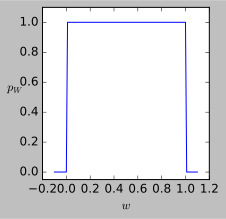

In [30]:
plt.figure(figsize=(3,3))
x = np.arange(-0.1, 1.1, 0.01)
pot= st.uniform(0,1)
print(pot.std())
plt.plot(x, pot.pdf(x))
plt.xlabel("$w$")
plt.ylim(-0.05,1.1)
plt.ylabel("$p_{W}$", rotation=0)
plt.savefig("../fig/appendix/uniform_pdf.pdf", bbox_inches='tight')

In [31]:
! mkdir ./data/diff_distrs/uniform
calc_u1_ratio(n=1000, T=100, pot=pot)

mkdir: ./data/diff_distrs/uniform: File exists


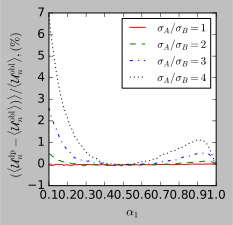

In [32]:
pot= st.uniform(0,1)
plot_and_save_u1(pot=pot, n=1000)

In [33]:
calc_u2_ratio(n=1000, T=100, pot=pot)

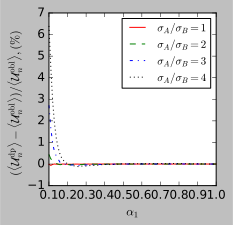

In [34]:
pot= st.uniform(0,1)
plot_and_save_u2(pot=pot, n=1000)

# Beta

0.15971914124998499


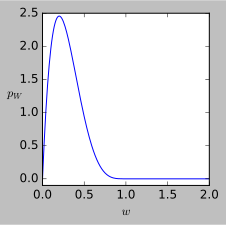

In [35]:
plt.figure(figsize=(3,3))
x = np.arange(0, 2, 0.01)
pot= st.beta(a=2,b=5)
print(pot.std())
plt.plot(x, pot.pdf(x))
plt.xlabel("$w$")
plt.ylabel("$p_{W}$", rotation=0)
plt.ylim(-0.1, 2.5)
plt.savefig("../fig/appendix/beta_pdf.pdf", bbox_inches='tight')

In [36]:
! mkdir ./data/diff_distrs/beta
pot= st.beta(2,5)
n=1000
calc_u1_ratio(n=n, T=100, pot=pot, param=param)

mkdir: ./data/diff_distrs/beta: File exists


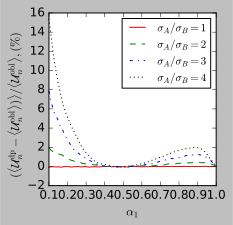

In [37]:
pot= st.beta(a=2,b=5)

plot_and_save_u1(pot=pot, n=1000)

In [38]:
! mkdir ./data/diff_distrs/beta
calc_u2_ratio(n=1000, T=100, pot=pot, param=param)

mkdir: ./data/diff_distrs/beta: File exists


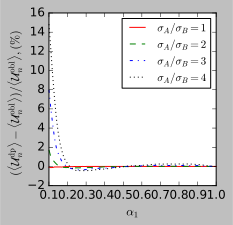

In [39]:
pot= st.beta(a=2,b=5)
plot_and_save_u2(pot=pot, n=1000)

# GM

In [40]:
class GM():

    def __init__(self, p, mean, std):
        self.p = p
        self.mean = mean
        self.std = std
        class Dist():
            def __init__(self):
                self.name='gm'
        self.dist = Dist()

        self.dist.name='gm'
        
    def rvs(self, n):
        g = st.bernoulli(self.p).rvs(n)
        w0 = st.norm(self.mean[0], self.std[0]).rvs(n)
        w1 = st.norm(self.mean[1], self.std[1]).rvs(n)
        q = np.zeros(n)
        q[g == 1] = w1[g == 1]
        q[g == 0] = w0[g == 0]
        return q

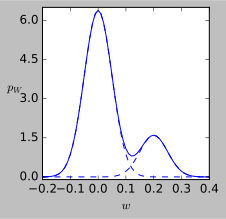

In [41]:
plt.figure(figsize=(3,3))
x=np.arange(-0.2, 0.4, 0.01)
p1 = 0.8 * st.norm(0, 0.05).pdf(x)
p2 = 0.2 * st.norm(0.2, 0.05).pdf(x)
plt.plot(x, p1, '--', color='b')
plt.plot(x, p2, '--', color='b')
plt.plot(x, p1 + p2, '-', color='b')
plt.xlabel("$w$")
plt.ylabel("$p_{W}$", rotation=0)
plt.ylim(-0.1, 6.5)
plt.yticks(np.arange(0.0, 7.0, 1.5).astype(float))
plt.savefig("../fig/appendix/gm_pdf.pdf", bbox_inches='tight')

In [42]:
! mkdir ./data/diff_distrs/gm
pot = GM(0.2, [0, 0.2], [0.05,0.05])
calc_u1_ratio(n=1000, T=100, pot=pot, param=param)

mkdir: ./data/diff_distrs/gm: File exists


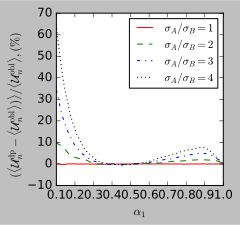

In [43]:
pot = GM(0.2, [0, 0.2], [0.05,0.05])
plot_and_save_u1(pot=pot, n=1000)

In [44]:
calc_u2_ratio(n=1000, T=100, pot=pot, param=param)

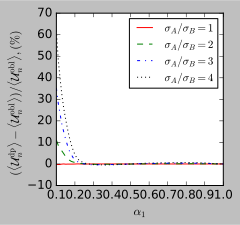

In [45]:
pot = GM(0.2, [0, 0.2], [0.05,0.05])
plot_and_save_u2(pot=pot, n=1000)